# DEMO EDA GRUAN

Exploratory Data Analysis (EDA) of Gruan Data Products (GDP) and Documentation

by Tommaso Locatelli

19/02/2025

## 0. Imports

In [1]:
# import
import pandas as pd
import netCDF4
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from noaa_ftp import NOAA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
import fitz
from IPython.display import Image

# helpers
from helpers.download_manager.download_manager import DownloadManager
DM=DownloadManager()
from helpers.format_manager.format_manager import FormatManager
FM=FormatManager()

# COSTANTS
FTP="ftp.ncdc.noaa.gov"

## 1. Download

All resources are made available at gruan.org but GDPs need Google and Gruan Login. So it way easier to exploit ftp.ncdc.noaa with noaa_ftp from https://github.com/javad-rzvn/noaa_ftp.

Image downloaded successfully


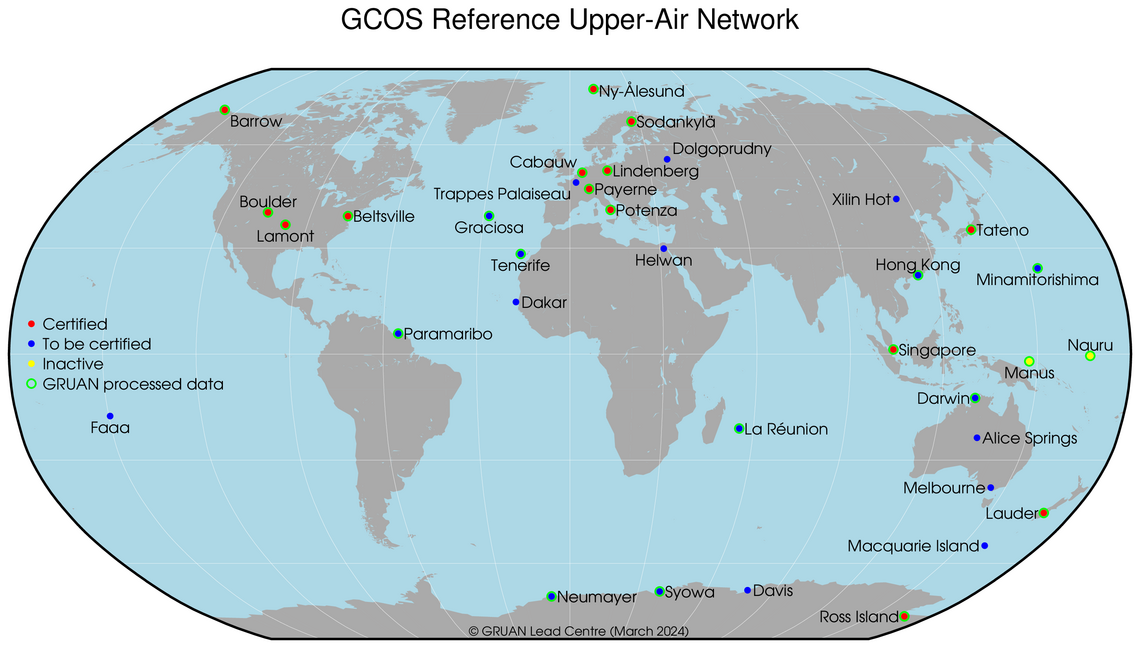

In [2]:
#look at sites
image_url=r'https://www.gruan.org/gruan/_processed_/3/b/csm_GRUAN-map-web_e665c52013.png'
image_name='gruan_sites.png'
DM.download_image_from_url(image_url=image_url,
                    downloaded_image_name=image_name)
Image(filename=r'download\\'+image_name)

Lets look at RS41 GRUAN Data Product Version 1 
(https://www.gruan.org/data/data-products/gdp/rs41-gdp-1)

This dataset comprises reference radiosoundings performed with the Vaisala RS41 radiosonde including subtypes with and without pressure sensor. Reference, in this case, means:

- correction for all known biases,
- best possible vertically resolved uncertainty estimates,
- well-documented correction algorithms,
- extensive collection of metadata.

Image downloaded successfully
Moved file from download\\availability_RS41_GDP_1_2024.png to data\\availability\\availability_RS41_GDP_1_2024.png


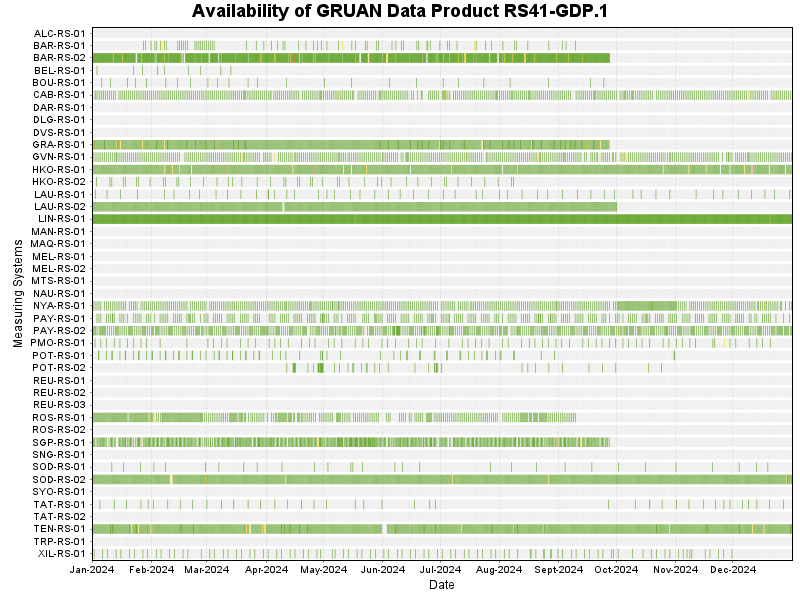

In [3]:
#look at availability
year=2024
image_url=r'https://www.gruan.org/fileadmin/Resources/Public/Plots/DataAvailability/plot_AAA-RS-00_RS41-GDP.1_'+str(year)+'.png'
image_name='availability_RS41_GDP_1_'+str(year)+'.png'
DM.download_image_from_url(image_url=image_url,
                downloaded_image_name=image_name)
DM.move_file(r'download\\'+image_name, r'data\\availability\\'+image_name)
Image(filename=r'data\\availability\\'+image_name)

Image downloaded successfully
Moved file from download\\availability_RS41_GDP_1_2025.png to data\\availability\\availability_RS41_GDP_1_2025.png


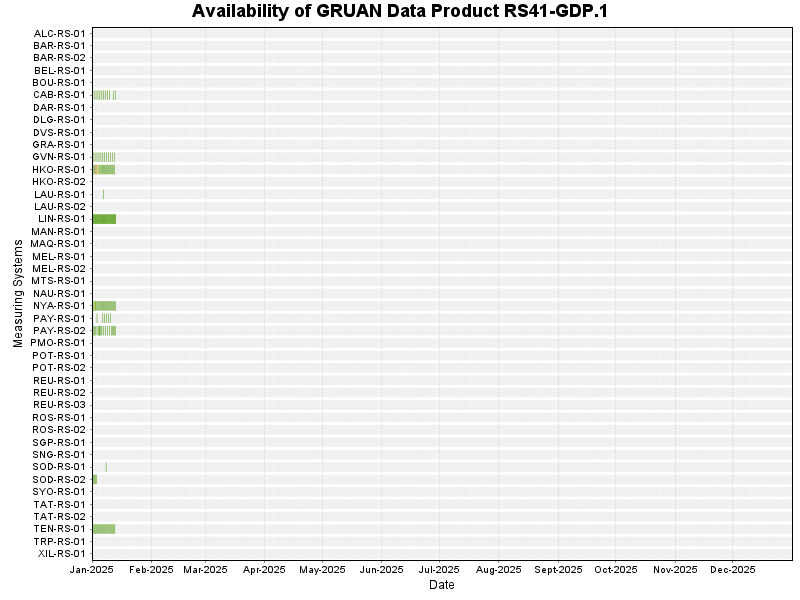

In [4]:
#look at availability
year=2025
image_url=r'https://www.gruan.org/fileadmin/Resources/Public/Plots/DataAvailability/plot_AAA-RS-00_RS41-GDP.1_'+str(year)+'.png'
image_name='availability_RS41_GDP_1_'+str(year)+'.png'
DM.download_image_from_url(image_url=image_url,
                downloaded_image_name=image_name)
DM.move_file(r'download\\'+image_name, r'data\\availability\\'+image_name)
Image(filename=r'data\\availability\\'+image_name)

In [5]:
# look at documentation
file_name="GRUAN-TN-13_RS41-GDP_UserGuide_v1_0.pdf"
pdf_document = "doc\\"+file_name
DM.download_pdf_from_url(pdf_url="https://www.gruan.org/gruan/editor/documents/gruan/GRUAN-TN-13_RS41-GDP_UserGuide_v1.0_2022-11-21.pdf",
            downloaded_pdf_name=file_name)
DM.move_file(source_path='download\\'+file_name, destination_path=pdf_document)

PDF downloaded successfully
Moved file from download\GRUAN-TN-13_RS41-GDP_UserGuide_v1_0.pdf to doc\GRUAN-TN-13_RS41-GDP_UserGuide_v1_0.pdf


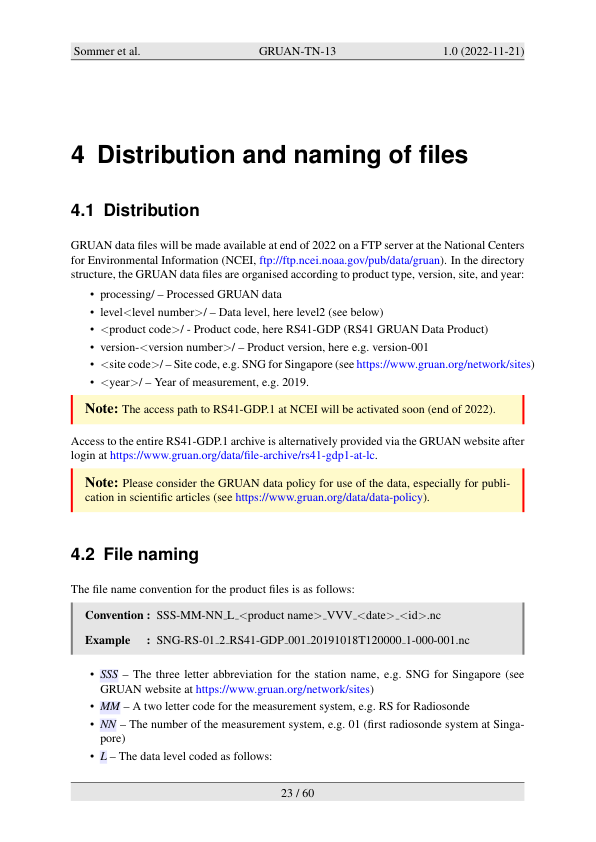

In [6]:
#distribution page
document = fitz.open(pdf_document)
page_number = 22
page = document.load_page(page_number)
pix = page.get_pixmap()
output_image_path = pdf_document+"_distribution_page.png"
pix.save(output_image_path)
Image(output_image_path)


In [7]:
#look for data directory
NOAA(FTP, 'pub/data/gruan/processing/level2').dir()

-rw----r-x   1 ftp      ftp          1479 Dec  2  2011 readme.txt
drwx---r-x   3 ftp      ftp            33 May 15  2019 RS-11G-GDP
drwx---r-x   3 ftp      ftp            33 Jul 12  2017 RS41-EDT
drwx---r-x   4 ftp      ftp            56 Aug 23  2012 RS92-GDP
drwx---r-x   4 ftp      ftp            56 Jul  1  2011 RS92-PROFILE-BETA


In [8]:
# look at documentation
file_name="GRUAN-TD-4_RS92-GDP_BriefDescription_v2_1_1.pdf"
pdf_document = "doc\\"+file_name
DM.download_pdf_from_url(pdf_url="https://www.gruan.org/gruan/editor/documents/gruan/GRUAN-TD-4_RS92-GDP_v2.1.1_2021-07-14.pdf",
            downloaded_pdf_name=file_name)
DM.move_file(source_path='download\\'+file_name, destination_path=pdf_document)

PDF downloaded successfully
Moved file from download\GRUAN-TD-4_RS92-GDP_BriefDescription_v2_1_1.pdf to doc\GRUAN-TD-4_RS92-GDP_BriefDescription_v2_1_1.pdf


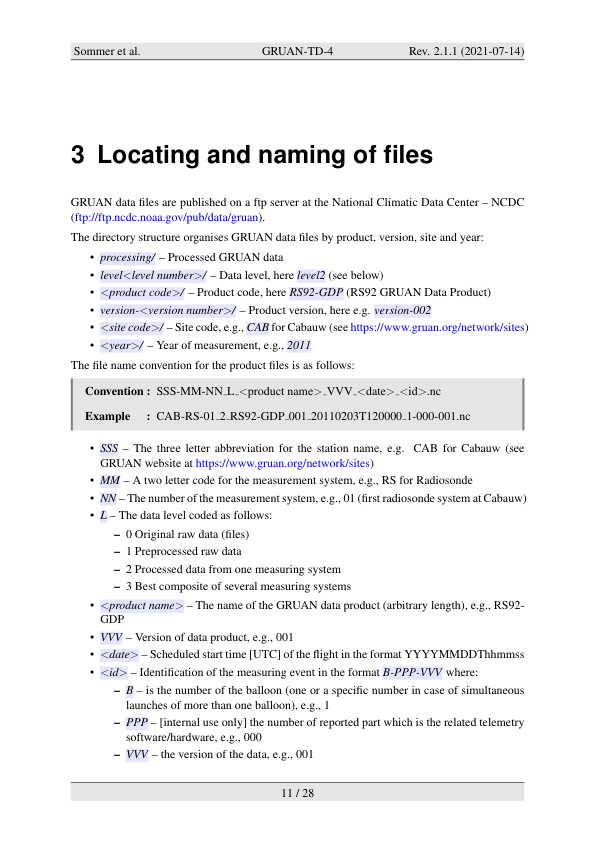

In [9]:
#distribution page
document = fitz.open(pdf_document)
page_number = 10
page = document.load_page(page_number)
pix = page.get_pixmap()
output_image_path = pdf_document+"_distribution_page.png"
pix.save(output_image_path)
Image(output_image_path)

In [2]:
#look for data directory
NOAA(FTP, 'pub/data/gruan/processing/level2/RS92-GDP').dir()

drwx---r-x   9 ftp      ftp           115 Oct 11  2011 version-001
drwx---r-x  21 ftp      ftp          4096 Mar  2  2021 version-002


In [11]:
#look for data directory
NOAA(FTP, 'pub/data/gruan/processing/level2/RS92-GDP/version-002/LIN/2021').dir()

-rw----r-x   1 ftp      ftp        731748 Jan 26  2021 LIN-RS-01_2_RS92-GDP_002_20210125T132400_1-000-001.nc
-rw----r-x   1 ftp      ftp        718368 Mar  3  2021 LIN-RS-01_2_RS92-GDP_002_20210302T181500_1-000-001.nc


In [12]:
dir_path=r'pub/data/gruan/processing/level2/RS92-GDP/version-002/LIN/2021'
file_name=r'LIN-RS-01_2_RS92-GDP_002_20210125T132400_1-000-001.nc'
noaa = NOAA(FTP, dir_path).download(file_name)
DM.move_file(file_name, 'data\\gdp\\'+file_name)

Downloading:   0% [                                  ] ETA:  --:--:--   0.0 s/B
Downloading:   0% [                                ] ETA:   0:00:50  14.0 KiB/s
Downloading:   2% [                                ] ETA:   0:00:20  33.7 KiB/s
Downloading:   6% [##                              ] ETA:   0:00:10  64.8 KiB/s
Downloading:  14% [####                            ] ETA:   0:00:05 119.8 KiB/s
Downloading:  30% [#########                       ] ETA:   0:00:02 217.8 KiB/s
Downloading:  62% [####################            ] ETA:   0:00:00 394.9 KiB/s
Downloading:  88% [############################    ] ETA:   0:00:00 537.1 KiB/s


Moved file from LIN-RS-01_2_RS92-GDP_002_20210125T132400_1-000-001.nc to data\gdp\LIN-RS-01_2_RS92-GDP_002_20210125T132400_1-000-001.nc


In [13]:
ftp=FTP
dir_path=r'pub/data/gruan/processing/level2/RS92-GDP/version-002/LIN/2021'
file_name=r'LIN-RS-01_2_RS92-GDP_002_20210302T181500_1-000-001.nc'
noaa = NOAA(ftp, dir_path).download(file_name)
DM.move_file(file_name, 'data\\gdp\\'+file_name)

Downloading:   0% [                                  ] ETA:  --:--:--   0.0 s/B
Downloading:   1% [                                ] ETA:   0:00:49  14.1 KiB/s
Downloading:   3% [                                ] ETA:   0:00:20  34.0 KiB/s
Downloading:   7% [##                              ] ETA:   0:00:09  66.4 KiB/s
Downloading:  15% [####                            ] ETA:   0:00:04 122.2 KiB/s
Downloading:  31% [##########                      ] ETA:   0:00:02 217.8 KiB/s
Downloading:  63% [####################            ] ETA:   0:00:00 393.0 KiB/s


Moved file from LIN-RS-01_2_RS92-GDP_002_20210302T181500_1-000-001.nc to data\gdp\LIN-RS-01_2_RS92-GDP_002_20210302T181500_1-000-001.nc


Some credit also too NetCDF Explorer (VSCode Extension) for let us look at .nc.info

## 2. Data preparation

Extract data from .nc files to Pandas Dataframes.

In [14]:
FM.read_nc_file(r'data\\gdp\\LIN-RS-01_2_RS92-GDP_002_20210125T132400_1-000-001.nc')
glb_attrs, data, vars_attrs=FM.return_dataframes()

In [15]:
glb_attrs

,Attribute,Value
0,Conventions,CF-1.4
1,title,RS92 GRUAN Data Product (Version 2)
2,institution,MOL - Lindenberg Meteorological Observatory; D...
3,source,RS92-SGP
4,history,2021-01-26 12:36:59.000Z RS92-GDP: RS92 GRUAN ...
5,references,Currently no references
6,comment,RS92 GRUAN Data Product
7,g.Product.ID,600978
8,g.Product.Code,RS92-GDP
9,g.Product.Name,RS92 GRUAN Data Product


In [16]:
data.head(10)

,press,temp,rh,wdir,wspeed,geopot,lon,lat,alt,u,...,u_temp,u_alt,u_press,res_rh,u_std_rh,cor_rh,u_cor_rh,u_rh,u_wdir,u_wspeed
time,,,,,,,,,,,,,,,,,,,,,
2021-01-25 13:24:24.000000000,989.057312,275.059906,0.840412,278.421326,4.936877,88.202385,14.120389,52.209377,88.149498,1.604084,...,0.102689,0.424029,0.331134,10.999731,NaN,0.019828,0.026530,0.026536,4.213295,0.37287
2021-01-25 13:24:25.000000000,988.581970,274.933960,0.840585,278.421326,4.936877,92.080231,14.120402,52.209347,92.025269,1.058383,...,0.126922,0.424029,0.331134,10.999731,0.000907,0.007244,0.025749,0.025754,4.213295,0.37287
2021-01-25 13:24:25.999511718,988.083618,274.885132,0.844365,278.421326,4.936877,96.146599,14.120450,52.209347,96.089088,1.554536,...,0.117603,0.424032,0.331132,10.999731,0.002535,0.015310,0.025593,0.025618,4.213295,0.37287
2021-01-25 13:24:26.999511718,987.511169,274.814270,0.847265,278.421326,4.936877,100.818985,14.120498,52.209373,100.758896,4.098856,...,0.118241,0.424037,0.331129,10.999731,0.004019,0.007663,0.025796,0.025841,4.213295,0.37287
2021-01-25 13:24:27.999511718,986.895569,274.729279,0.849199,278.421326,4.936877,105.845261,14.120539,52.209389,105.782104,4.600056,...,0.122968,0.424046,0.331127,10.999731,0.004804,0.007251,0.025848,0.025899,4.213295,0.37287
2021-01-25 13:24:28.999511718,986.252502,274.643341,0.852376,278.421326,4.936877,111.097481,14.120612,52.209389,111.031410,5.238185,...,0.126163,0.424059,0.331124,10.999731,0.006672,0.004774,0.025978,0.026059,4.213295,0.37287
2021-01-25 13:24:29.999511718,985.575989,274.566956,0.855998,278.421326,4.936877,116.624962,14.120691,52.209389,116.555717,5.770647,...,0.126044,0.424077,0.331121,10.999731,0.008909,0.011593,0.025925,0.026052,4.213295,0.37287
2021-01-25 13:24:30.999511718,984.885071,274.493805,0.859475,278.421326,4.936877,122.272408,14.120786,52.209400,122.199829,5.345628,...,0.124522,0.424105,0.331118,10.999731,0.010612,0.014691,0.025947,0.026111,4.213295,0.37287
2021-01-25 13:24:31.999511718,984.200684,274.422272,0.862994,278.421326,4.936877,127.868851,14.120864,52.209442,127.793076,6.209252,...,0.122437,0.424133,0.331115,10.999731,0.011876,0.013492,0.026061,0.026253,4.213295,0.37287


In [18]:
vars_attrs

,standard_name,units,long_name,g_format_type,g_format_format,g_format_width,g_format_nan,g_processing_flag,g_source_desc,g_column_type,g_resolution,comment,related_columns,variable
0,air_pressure,hPa,Pressure,FLT,F8.3,8,NaN,"raw, smoothed, internal QC passed, additional ...",FRAWPTU,original data,15.0 s (time),Barometric air pressure using silicon sensor u...,u_press,press
1,air_temperature,K,Temperature,FLT,F6.2,6,NaN,"raw, uncertainy calculated, corrected, interna...",FRAWPTU_RC_or,original data,10.0 s (time),"Air temperature, uncertainty estimated with GR...",u_cor_temp u_std_temp u_temp,temp
2,relative_humidity,1,Relative Humidity,FLT,F6.2,6,NaN,"raw, uncertainy calculated, corrected, interna...",FRAWPTU_U1-U2_cc_RC_TL,original data,see column res_rh,Relative humidity collated from U1 and U2 base...,u_std_rh u_cor_rh u_rh,rh
3,wind_from_direction,degree,Wind Direction,FLT,F5.1,5,NaN,"uncertainy calculated, smoothed",RS92,original data,40.0 s (time),"Wind direction with 0°:north, 90°:east, 180°:s...",u_wdir,wdir
4,wind_speed,m s-1,Wind Speed,FLT,F6.2,6,NaN,"uncertainy calculated, smoothed",RS92,original data,40.0 s (time),Wind speed,u_wspeed,wspeed
5,geopotential_height,m,Geopotential Altitude,FLT,F7.1,7,NaN,smoothed,FRAWPTU,derived data product,15.0 s (time),Geopotential altitude from corrected pressure ...,NaN,geopot
6,eastward_wind,m s-1,Zonal Wind,FLT,F6.1,6,NaN,raw,GPSDCC_RESULT,original data,1.0 s (time),Wind towards the east,NaN,u
7,northward_wind,m s-1,Meridional Wind,FLT,F6.1,6,NaN,raw,GPSDCC_RESULT,original data,1.0 s (time),Wind towards the north,NaN,v
8,NaN,K,Frostpoint,FLT,F6.2,6,NaN,"raw, internal QC passed, additional QC passed",FRAWPTU_U1-U2_cc_RC_TL,derived data product,10.0 s (time),Frost point temperature calculated from relati...,NaN,FP
9,Water_vapor_mixing_ratio,1,Water Vapor Volume Mixing Ratio,FLT,E10.2,10,NaN,"raw, internal QC passed, additional QC passed",FRAWPTU_U1-U2_cc_RC_TL,derived data product,10.0 s (time),Volume mixing ratio (mol/mol) of water vapor c...,NaN,WVMR


## 3. Data analysis

In [19]:
data.shape

(5925, 29)

In [20]:
data.columns

Index(['press', 'temp', 'rh', 'wdir', 'wspeed', 'geopot', 'lon', 'lat', 'alt',
       'u', 'v', 'FP', 'WVMR', 'asc', 'SWrad', 'u_SWrad', 'cor_temp',
       'u_cor_temp', 'u_std_temp', 'u_temp', 'u_alt', 'u_press', 'res_rh',
       'u_std_rh', 'cor_rh', 'u_cor_rh', 'u_rh', 'u_wdir', 'u_wspeed'],
      dtype='object')

In [21]:
data.head()

,press,temp,rh,wdir,wspeed,geopot,lon,lat,alt,u,...,u_temp,u_alt,u_press,res_rh,u_std_rh,cor_rh,u_cor_rh,u_rh,u_wdir,u_wspeed
time,,,,,,,,,,,,,,,,,,,,,
2021-01-25 13:24:24.000000000,989.057312,275.059906,0.840412,278.421326,4.936877,88.202385,14.120389,52.209377,88.149498,1.604084,...,0.102689,0.424029,0.331134,10.999731,NaN,0.019828,0.026530,0.026536,4.213295,0.37287
2021-01-25 13:24:25.000000000,988.581970,274.933960,0.840585,278.421326,4.936877,92.080231,14.120402,52.209347,92.025269,1.058383,...,0.126922,0.424029,0.331134,10.999731,0.000907,0.007244,0.025749,0.025754,4.213295,0.37287
2021-01-25 13:24:25.999511718,988.083618,274.885132,0.844365,278.421326,4.936877,96.146599,14.120450,52.209347,96.089088,1.554536,...,0.117603,0.424032,0.331132,10.999731,0.002535,0.015310,0.025593,0.025618,4.213295,0.37287
2021-01-25 13:24:26.999511718,987.511169,274.814270,0.847265,278.421326,4.936877,100.818985,14.120498,52.209373,100.758896,4.098856,...,0.118241,0.424037,0.331129,10.999731,0.004019,0.007663,0.025796,0.025841,4.213295,0.37287
2021-01-25 13:24:27.999511718,986.895569,274.729279,0.849199,278.421326,4.936877,105.845261,14.120539,52.209389,105.782104,4.600056,...,0.122968,0.424046,0.331127,10.999731,0.004804,0.007251,0.025848,0.025899,4.213295,0.37287


In [22]:
#trajectory
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=data['lon'], 
    y=data['lat'], 
    z=data['alt'],
    mode='lines',
    name='Trajectory'
))

fig.update_layout(
    title='Trajectory Over Time',
    scene = dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Altitude'
    )
)

fig.show()

In [23]:
bound=50
lat_min, lat_max = data['lat'].min() - bound, data['lat'].max() + bound
lon_min, lon_max = data['lon'].min() - bound, data['lon'].max() + bound
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    lon = data['lon'],
    lat = data['lat'],
    mode = 'lines',
    line = dict(width=2, color='blue'),
    name = 'Trajectory'
))

fig.update_geos(
    projection_type="natural earth",
    showland=True, landcolor="lightgray",
    showocean=True, oceancolor="lightblue",
    showcountries=True, countrycolor="black",
    showlakes=True, lakecolor="lightblue",
    showrivers=True, rivercolor="blue",
    lataxis_range=[lat_min, lat_max],
    lonaxis_range=[lon_min, lon_max]
)

fig.update_layout(
    title='Trajectory on World Map',
    geo=dict(
        resolution=110,
        center=dict(lat=data['lat'].mean(), lon=data['lon'].mean()),
        projection_scale=10
    )
)

fig.show()


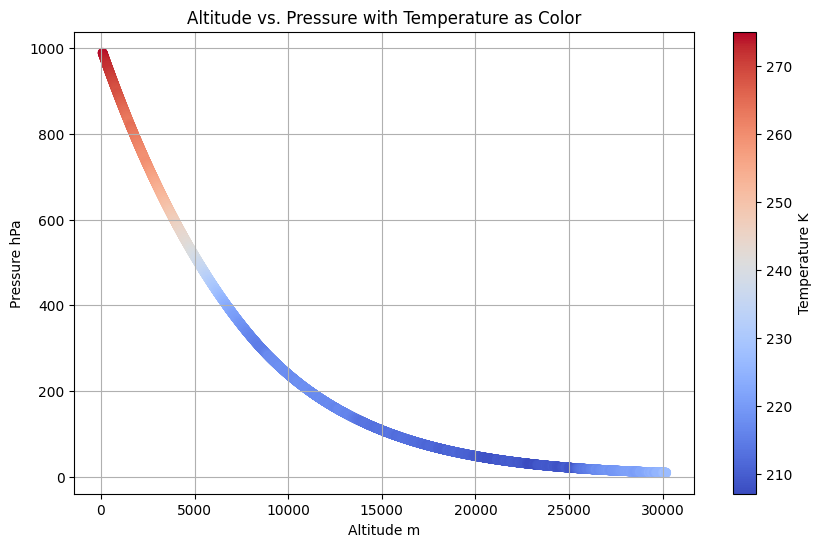

In [24]:
# Plotting
plt.figure(figsize=(10, 6))

sc = plt.scatter(data['alt'], data['press'], c=data['temp'], cmap='coolwarm', marker='o')
plt.colorbar(sc, label='Temperature '+vars_attrs[vars_attrs['variable']=='temp']['units'].values[0])

plt.xlabel('Altitude m')
plt.ylabel('Pressure '+vars_attrs[vars_attrs['variable']=='press']['units'].values[0])
plt.title('Altitude vs. Pressure with Temperature as Color')
plt.grid(True)
plt.show()


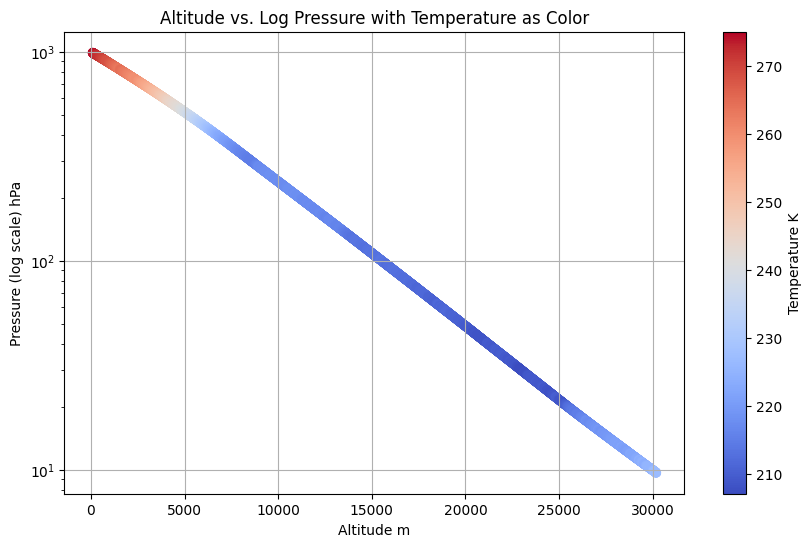

In [25]:
# Plotting
plt.figure(figsize=(10, 6))

sc = plt.scatter(data['alt'], data['press'], c=data['temp'], cmap='coolwarm', marker='o')
plt.colorbar(sc, label='Temperature '+vars_attrs[vars_attrs['variable']=='temp']['units'].values[0])

plt.yscale('log')

plt.xlabel('Altitude m')
plt.ylabel('Pressure (log scale) '+vars_attrs[vars_attrs['variable']=='press']['units'].values[0])
plt.title('Altitude vs. Log Pressure with Temperature as Color')
plt.grid(True)
plt.show()

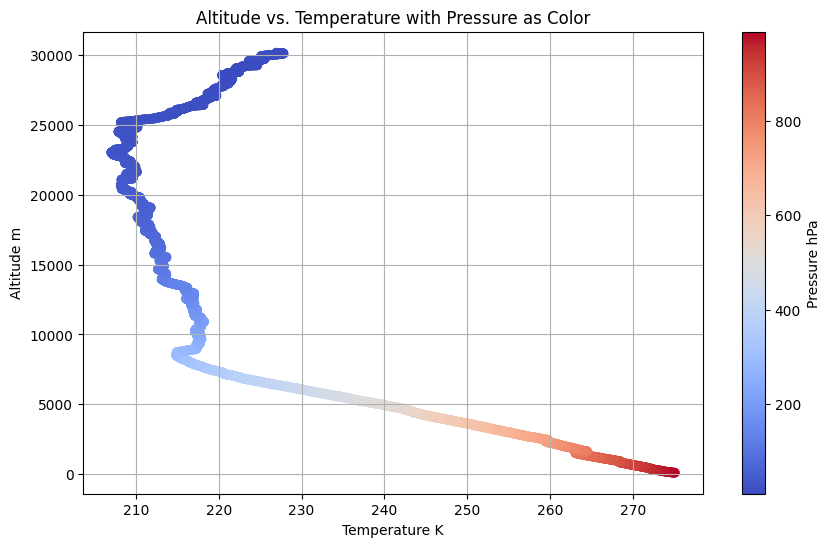

In [26]:
# Plotting
plt.figure(figsize=(10, 6))

sc = plt.scatter(data['temp'], data['alt'], c=data['press'], cmap='coolwarm', marker='o')
plt.colorbar(sc, label='Pressure '+vars_attrs[vars_attrs['variable']=='press']['units'].values[0])

plt.xlabel('Temperature '+vars_attrs[vars_attrs['variable']=='temp']['units'].values[0])
plt.ylabel('Altitude m')
plt.title('Altitude vs. Temperature with Pressure as Color')
plt.grid(True)
plt.show()

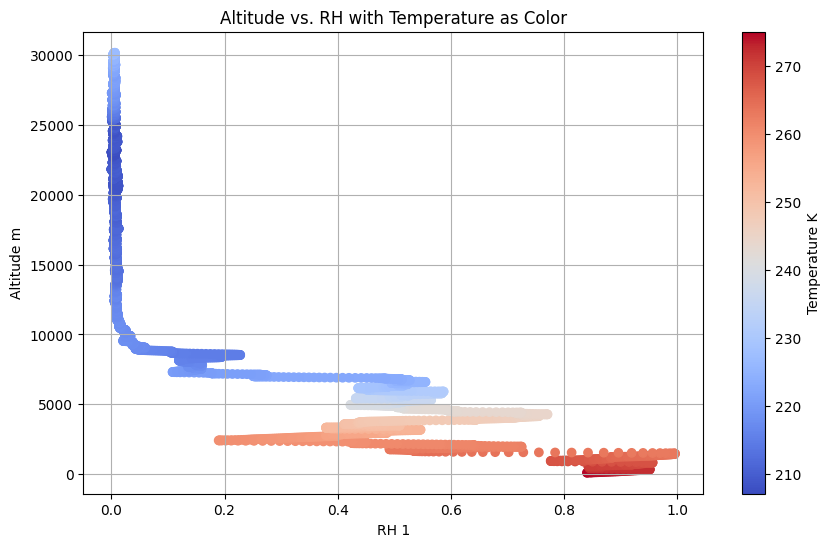

In [27]:
# Plotting
plt.figure(figsize=(10, 6))

sc = plt.scatter(data['rh'], data['alt'], c=data['temp'], cmap='coolwarm', marker='o')
plt.colorbar(sc, label='Temperature '+vars_attrs[vars_attrs['variable']=='temp']['units'].values[0])

plt.xlabel('RH '+vars_attrs[vars_attrs['variable']=='rh']['units'].values[0])
plt.ylabel('Altitude m')
plt.title('Altitude vs. RH with Temperature as Color')
plt.grid(True)
plt.show()

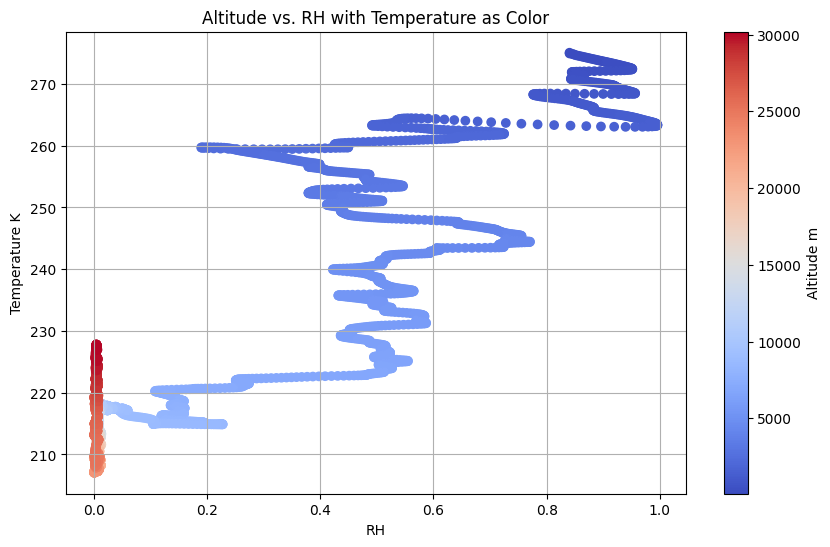

In [28]:
# Plotting
plt.figure(figsize=(10, 6))

sc = plt.scatter(data['rh'], data['temp'], c=data['alt'], cmap='coolwarm', marker='o')
plt.colorbar(sc, label='Altitude m')

plt.xlabel('RH')
plt.ylabel('Temperature '+vars_attrs[vars_attrs['variable']=='temp']['units'].values[0])
plt.title('Altitude vs. RH with Temperature as Color')
plt.grid(True)
plt.show()

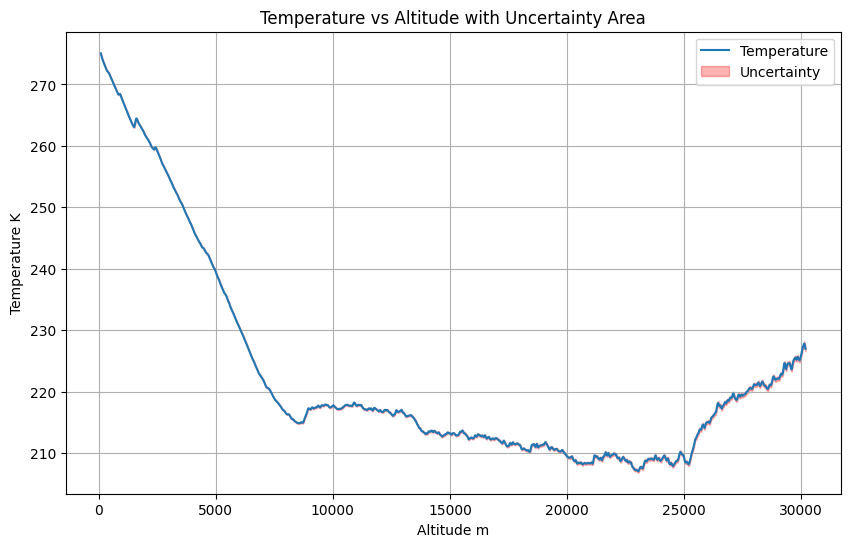

In [29]:
alt = data['alt']
temp = data['temp']
u_temp = data['u_temp']

plt.figure(figsize=(10, 6))
plt.plot(alt, temp, label='Temperature')
plt.fill_between(alt, temp - u_temp, temp + u_temp, color='red', alpha=0.3, label='Uncertainty')
plt.xlabel('Altitude m')
plt.ylabel('Temperature K')
plt.title('Temperature vs Altitude with Uncertainty Area')
plt.legend()
plt.grid(True)
plt.show()

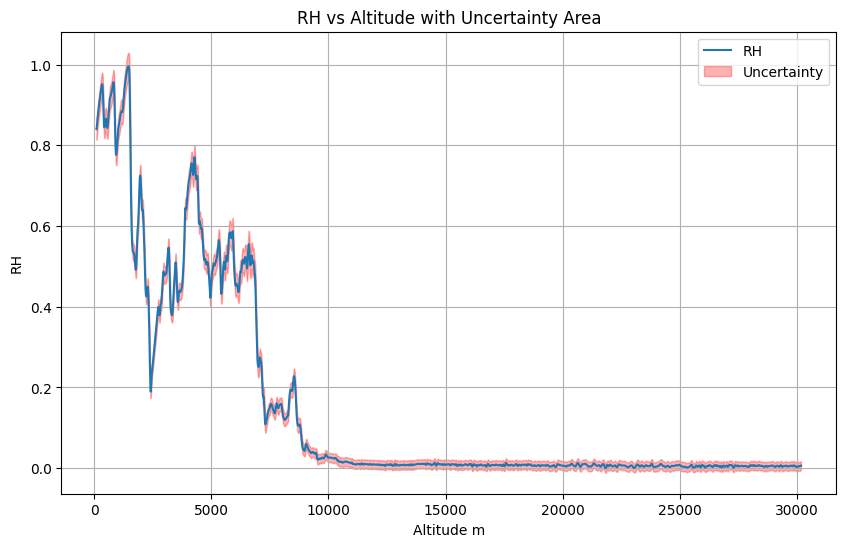

In [30]:
alt = data['alt']
temp = data['rh']
u_temp = data['u_rh']

plt.figure(figsize=(10, 6))
plt.plot(alt, temp, label='RH')
plt.fill_between(alt, temp - u_temp, temp + u_temp, color='red', alpha=0.3, label='Uncertainty')
plt.xlabel('Altitude m')
plt.ylabel('RH')
plt.title('RH vs Altitude with Uncertainty Area')
plt.legend()
plt.grid(True)
plt.show()

https://www.ncl.ucar.edu/Document/Functions/Built-in/trop_wmo.shtml

tropo wmo def by Madonna